# The Hopfield network

## A slight change in notation
The Hopfield network formulation that we are going to adopt for this practical is slightly different from the one described in the slides. Specifically, we will call the state of neuron $i$ $x_i$ instead of $a_i$. Additionally, we will use the _symmetric_ `hardlim` activation function, meaning that our neurons will take on either 1 or -1 (instead of 1 or 0).

## A technical note
There's a small bug in the simulations which we will run later in the notebook, so it may be the case that when you run them you will see the command buttons appearing multiple times. While I work on a robust fix, the quick hack is to go into `utils_assignment_6.py` and comment with a `#` the lines 158 and 248. Let us know if you experience problems.

## Part 1 - Network mechanics

Let's dive a bit deeper in the mechanics of the network. How do we update the state of the network to retrieve patterns stored? For a network with $N$ neurons, we begin by picking a neuron $x_i$ at random, we then compute the __field__ $h_i$ at neuron $x_i$, which is given by 

\begin{align}
h_i = \sum_{j=1}^N w_{ij}x_j
\end{align}

As you can see, the field is the sum of the 'input' that neuron $x_i$ receives from all the other neurons, multiplied by the weight with which they are connected. Remember that the connections are symmetric, so $w_{ij}=w_{ji}$, and there is no self connectivity, so $w_{ii}=0$. Lastly, we update the state of $x_i$ with
 
\begin{align}
1 & \leftarrow x_i \quad \mathrm{if} h_i \geq 0 \\
-1 & \leftarrow x_i \quad \mathrm{if} h_i < 0
\end{align}

(the arrow is a notation which means 'set $x_i$ to'). In this assignment, we will be updating the networks __asynchronously__, meaning that we randomly pick one neuron at a time and update its value (as opposed to synchronously updating the state of all neurons at once).

### Question 1
Consider a very simple case where you only have two neurons, $x_1$ and $x_2$, connected with weights $w_{12}$. We want to update the state of $x_1$ given that $x_2=1$. Write down the field $h_1$ for two cases of $w_{12}=1$ and $w_{12}=-1$. Then, explain your intuition for how the state of $x_2$ (regardless of whether it is 1 or -1) influences the state of $x_1$ for the two cases of positive and negative weight.  

### Answer 1

\begin{align}
h_i &= \sum_{j=1}^N w_{ij}x_j\\
&= w_{12}x_2\\
&= 1 \times 1\\
&= 1
\end{align}

- In the case of positive weight, $x_1$ will force $x_2$ to the same activation state. 
- For the case of negative weight it will force it the oppositive activation state (anticorrelation). 

In the lecture, you have seen an equation that describes how we can change the weights of the network to store a pattern. In the current notation, if we have a single pattern $\mathbf{x}=(x_1, \ldots, x_n)$ that we would like to store, we can set the weights to

\begin{equation}
w_{ij} =  x_i x_j
\end{equation}

Can we understand why this rule works?

### Question 2
For the rule above to work, we need to have effectively made $\mathbf{x}$ into a fixed point of the network (which is equivalent to say that it needs to be a minimum in the energy landscape or an attractor), so that once the system is in this state it does not drift away. Show that with $w_{ij}=x_ix_j$, $\mathbf{x}$ is indeed a fixed point.

__Hint__: write out the field $h_i$ as we did before, and fill in the expression for $w_{ij}$.

### Answer 2

\begin{align}
h_i &= \sum_{j=1}^1 w_{ij}x_j\\
&= \sum_{j \neq i} x_i x_j x_j\\
&= \sum_{j \neq i} x_i \\
&= (N-1)x_i
\end{align}

This shows that if $x_i$ is positive, $h_i$ will be positive, and if $x_i$ is negative, $h_i$ will be negative, meaning that in either case it will not change.

### Question 3
We consider again the toy example of two neurons. We want to store the pattern [1, -1] (i.e. $x_1=1$, $x_2=-1$) in our network, so we set $w_{12} = x_1 x_2$. 

Suppose we are at an initial state $x_1=1$, $x_2=1$. Using the update rule described above, we can easily calculate by hand how the state of the network will evolve over time. Since we are updating asynchronously by picking neurons to be updated at random at each update step, we want to consider different iteration trajectories (different orders in which we select the neurons to be updated). In particular, we need to make sure that we consider the case where we update first neuron 1 and then neuron 2, and vice versa.

Compute the update of the network for the following orderings: 2121 and 1212 (where 1212 means: update neuron 1, then update neuron 2, then update neuron 1, then update neuron 2), then write down the state which the network converged to for both cases. Why am I not considering orderings like 1122 or 1112?

### Answer 3

\begin{align}
x_2 &= \mathrm{sgn}(w_{12}x_1) = -1 \times 1  = -1\\
x_1 &= \mathrm{sgn}(w_{12}x_2) = -1 \times -1 = 1\\
x_2 &= \mathrm{sgn}(w_{12}x_1) = -1 \times 1  = -1\\
x_1 &= \mathrm{sgn}(w_{12}x_2) = -1 \times -1 = 1\\
\end{align}

Attractor: $x_1 = 1$, $x_2=-1$

\begin{align}
x_1 &= \mathrm{sgn}(w_{12}x_2) = -1 \times  1 = -1\\
x_2 &= \mathrm{sgn}(w_{12}x_1) = -1 \times -1 =  1\\
x_1 &= \mathrm{sgn}(w_{12}x_2) = -1 \times  1 = -1\\
x_2 &= \mathrm{sgn}(w_{12}x_1) = -1 \times -1 =  1\\
\end{align}

Attractor: $x_1 =-1$, $x_2=1$

Ordering like 1122 are redundant because after updating a neuron, updating it again will not change its value since the update rule is fully deterministic and the other neurons haven't changed. 

### Question 4
If you have answered the previous question correctly, you should discover something puzzling. What is it?   

### Answer 4
The network converges to the correct pattern in the first case, but it converges to the negative of the correct pattern in the second case. The negative (negation) of a stored pattern is an instance of a _spurious_ pattern which has also become an attractor of the network.

### Question 5

You may very well have seen this oddity coming already before computing the updates of the network. Explain where you have (or could have) seen it.

_Hint:_ think about how we set the weights!

### Answer 5

A pattern $\mathbf{x}$ and its negation $-\mathbf{x}$ both generate the same set of weights. In our simple example, storing ($x_1 = 1$, $x_2=-1$) results in $w_{12}=-1$, but so does storing the pattern ($x_1 =-1$, $x_2=1$). This implies that both patterns become attractors whenever one of the two is stored. The initialization and the order of update determine which one we will converge to.

## Part 2 - Simulating a Hopfield network

We will now turn to a simulation of the Hopfield network. We begin with a simple example: if you run the code cell below, two buttons will appear. The 'Initialize and train' button will initialize a Hopfield network and train it with the specific pattern of 1 and -1 given by the variable `train_data`. The 'Update network' button will run a number of asynchronous update steps which you can specify in the text cell 'Number of updates'.

We will monitor the simulation with four plots. In the top left, we have the stored pattern, composed of 1 and -1 (in the default case, a very simple row of -1 on the top, and ones in the remaining entries). In the top right, we show the pattern that we will start retrieving our stored patterns from (the `input_data`). In the bottom left, we show the weights connecting the different neurons. Lastly, in the bottom right, we have the energy, and we will look at how it varies as we run asynchronous updates of our network.

Run the cell below, press 'Initialize and train', and then run a few updates with the 'Update network' button. Make sure you understand what is shown in the plots and verify whether the energy indeed decreases as we update the network.

Remember that if the notebook automatically creates an output window, forcing you to scroll up and down to visualize the full output, you can go into the menu and click on Cell - Current Outputs - Toggle Scrolling.

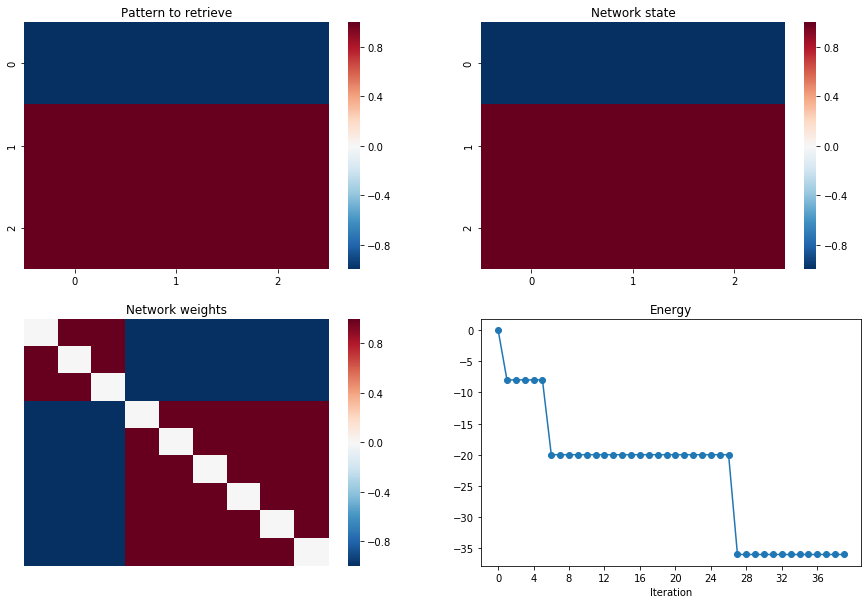

In [1]:
import numpy as np
from utils_assignment_6 import simulation_0
train_data  = np.array([[-1, -1, -1, 1, 1, 1, 1, 1, 1]])
input_data  = np.array([1, -1, 1, 1, 1,  1,  1, 1, -1])
sim = simulation_0(train_data, input_data)
sim.start_simulation()

### Question 1
If you reinitialize the network and update it until convergence a few time, does it always take the same amount of iterations to stabilize at its fixed point? Why is that?

### Answer 1
No, because we are updating asynchronously!

### Question 2
Does the network always converge to the correct pattern (i.e. the one we stored)?

### Answer 2
Given this initial state, which is quite close to the pattern to be retrieved, the network should always converge to the correct pattern. 

### Question 3
The Hopfield network is built on the Hebbian learning rule, which is often summarized by the catchy motto _neurons that fire together wire together, neurons that fire out of synch fail to link_. Can you explain how the trained weights shown in the simulation in fact match this rule?

Hint: think about each individual neuron, look at the neurons that are correlated with it during 'imprinting', and try to reason about the resulting weights. 

### Answer 3
In the weight matrix, you can spot two clusters of weights equal to 1, which connect neurons that have the same activation in the stored pattern (the top row and the rest). Neurons in the top row, on the other hand, have a negative connection to the ones in the rest of the pattern, as they have opposite activations.  

Let's now store something that is slightly more interesting, such as a very pixelated letter. Run the cell below and run the simulation to retrieve the stored letter A.

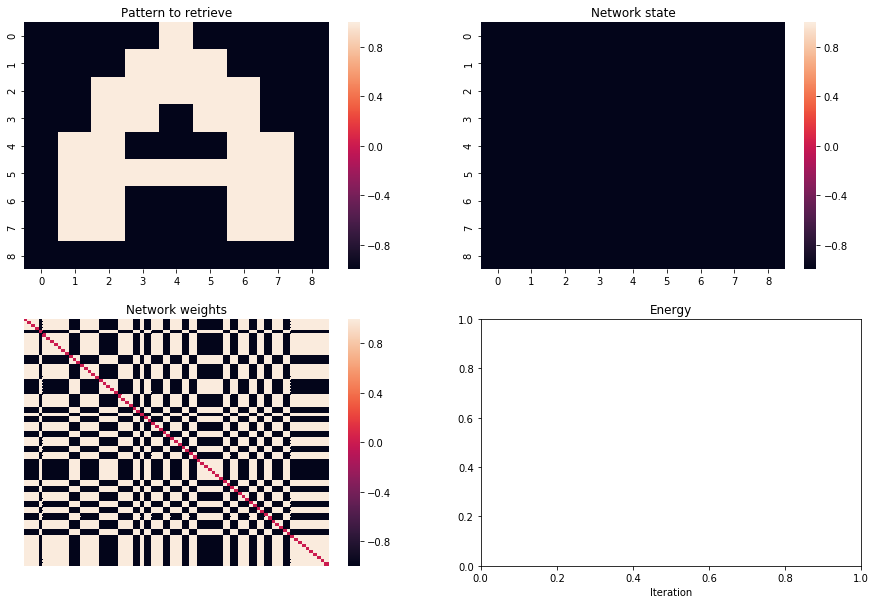

In [7]:
import numpy as np
from utils_assignment_6 import simulation_0, letter_A
train_data  = letter_A.reshape(1, 81)
input_data  = -np.ones(81)
sim = simulation_0(train_data, input_data)
sim.start_simulation()

So far we have only stored a single pattern in our networks, but an associative memory that stores only one pattern is not the most useful thing in the world. In order to store $p$ patterns, we need to adapt our learning rule, to the following

\begin{equation}
w_{ij} = \sum_{l=1}^p x_i^lx_j^l
\end{equation}

Hopfield networks are a _content-addressable memory_, meaning that we can use _content_ to retrieve something that was stored. A potential application of such a memory is to retrieve a pattern given that we only have access to part of the content, or to a noisy or corrupted version of it. To cast this in a neuroscientific framework, we can think of a memory as being composed of different sensory experiences in different sensory modalities. But if we are exposed to the sensory experience of one modality, our brain will often use that information to regenerate the full memory. In this simple example, we will try to retrieve stored 'memories' of the letters A and B from noisy versions of the two letters.

The workflow in this simulation will be slightly different than before. If you run the cell below, you will get a few new widgets. 
- Input: allows you to choose whether to give letter A or letter B as an input to the network (i.e. as a starting point for the retrieval of patterns).
- Amount of noise: select the amount of noise with which to corrupt the input pattern.
- Generate random input: generate a new corrupted input from the selected letter and with the given amount of noise. 

To perform experiments with this simulations, you will have to run the cell below, then press 'Initialize and train',  then you can repeatedly click on 'Generate random input' to create new input patterns, and use 'Update network' to see how the network state evolves over time. 

In [8]:
import numpy as np
from utils_assignment_6 import simulation, letter_A, letter_B
train_data  = np.vstack((letter_A.reshape(1, 81), letter_B.reshape(1, 81)))
sim = simulation(train_data)
sim.start_simulation()

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

### Question 4
Begin with moderate amounts of noise: can the network retrieve both input patterns correctly?

### Answer 4

Yes. 

### Question 5
Up to what levels of noise can we consider the retrieval process reliable? Give an estimate.

### Answer 5

Depends on your experience, but high in general high levels of noise are tolerable. Hopfield networks are recognized for their noise-tolerance.

### Question 6
Suppose we have several patterns that we would like to store in our memory. Suppose also that of these patterns some are particularly important, and we want to be sure that we will be able to retrieve them. Can you think of a way to ensure that these 'high priority' patterns are stored with higher resistance to noise?

_Hint_: Think how you could adapt the equation for $w_{ij} = \sum_{l=1}^p x_i^lx_j^l$.

### Answer 6
We can store a pattern multiple times, which is equivalent to giving it a higher _degree_ $d_l$, such that the update rule becomes $w_{ij} = \sum_{l=1}^p d_l x_i^lx_j^l$. The higher the degree, the higher the contribution of the pattern to the setting of the weights.